<a href="https://colab.research.google.com/github/lexxai/goit_python_ds_hw_02/blob/main/Hw2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Частина третя: Аналіз датасет c Kaggle.com

# Прочитайте csv файл (використовуйте функцію read_csv)

In [92]:
import pandas as pd

URL="/content/bestsellers with categories.csv"
df = pd.read_csv(URL)
assert df is not None, "DATA NOT READ FROM THE URL"

# Виведіть перші п'ять рядків (використовується функція head)


In [93]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Виведіть розміри датасету (використовуйте атрибут shape)

In [94]:
df.shape

(550, 7)

## Про скільки книг зберігає дані датасет?
Відповідь: 550


# Для спрощення подальшої роботи давайте трохи підправимо назви змінних.

In [95]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head(1)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction


# Первинне дослідження даних

## Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)


In [96]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

### Чи є в якихось змінних пропуски? (Так / ні)
Відповідь: ні

## Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [97]:
df.nunique()

name           351
author         248
user_rating     14
reviews        346
price           40
year            11
genre            2
dtype: int64

In [98]:
df["genre"].nunique()

2

In [99]:
pd.unique(df["genre"])

array(['Non Fiction', 'Fiction'], dtype=object)


### Які є унікальні жанри?
Відповідь: 'Non Fiction', 'Fiction'




## Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

<Axes: title={'center': ' розподіл цін'}, ylabel='Frequency'>

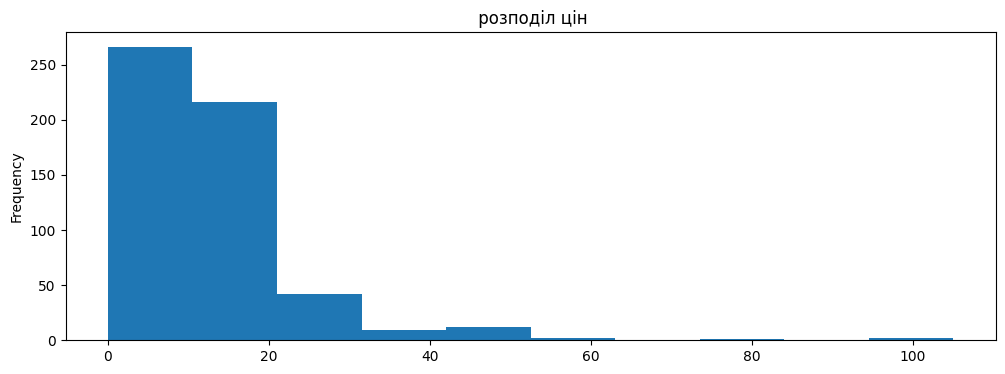

In [100]:
df["price"].plot(figsize=(12,4), title=" розподіл цін", kind="hist")

## Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [101]:
print("MAX:", df["price"].max())
print("mean:", df["price"].mean())
print("median:", df["price"].median())
print("MIN:", df["price"].min())


MAX: 105
mean: 13.1
median: 11.0
MIN: 0


### Максимальна ціна?
Відповідь: 105
### Мінімальна ціна?
Відповідь:   0
### Середня ціна?
Відповідь:      13.1
### Медіанна ціна?
Відповідь:     11

# Пошук та сортування даних

## Який рейтинг у датасеті найвищий?

In [102]:
df['user_rating'].max()

4.9

Відповідь: 4.9

## Скільки книг мають такий рейтинг?

In [103]:
max_r = df['user_rating'].max()
df[df['user_rating'] == max_r].shape[0]

52

Відповідь: 52

## Яка книга має найбільше відгуків?

In [104]:
df.sort_values(by ="reviews",ascending=False).iloc[0]["name"]

'Where the Crawdads Sing'

In [105]:
df[df["reviews"]==df["reviews"].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [106]:
df.loc[df["reviews"].idxmax()]["name"]

'Where the Crawdads Sing'

Відповідь: Where the Crawdads Sing

## З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [107]:
top50 = df[df['year'] == 2015].sort_values(by ="user_rating",ascending=False)[:50]

print(top50.sort_values(by ="price",ascending=False).iloc[0]["name"])

Publication Manual of the American Psychological Association, 6th Edition


In [108]:
print(top50[top50["price"]==top50["price"].max()].iloc[0]["name"])

Publication Manual of the American Psychological Association, 6th Edition


In [109]:
top50.loc[top50["price"].idxmax()]["name"]

'Publication Manual of the American Psychological Association, 6th Edition'

Відповідь: "Publication Manual of the American Psychological Association, 6th Edition"

## Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?



In [110]:
top50 = df[ (df['year'] == 2010) & (df['genre'] == "Fiction") ].sort_values(by ="user_rating",ascending=False)[:50]
top50.shape[0]

20

Відповідь: 20

## Який рейтинг у датасеті найвищий?

In [111]:
top50.iloc[0].user_rating

4.8

## Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [112]:
df[ (df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]) ) ]

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


In [113]:
query_df = "( user_rating == 4.9 ) & ( year.isin([2010, 2011]) ) "
df.query(query_df)

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


Відповідь: 1

## І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values)

In [114]:
df[ (df['year'] == 2015) & (df['price'] < 8) ].sort_values(by=["price","user_rating"],ascending=[True, False])

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction


### Яка книга остання у відсортованому списку?
Відповідь: "Old School (Diary of a Wimpy Kid #10)"

# Агрегування даних та з'єднання таблиць

## Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [115]:
df[["genre","price"]].groupby("genre").agg(['min', 'max'])

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

### Максимальна ціна для жанру Fiction ?

Відповідь: 82

### Мінімальна ціна для жанру Fiction ?

Відповідь: 0

### Максимальна ціна для жанру Non Fiction?

Відповідь: 105

### Мінімальна ціна для жанру Non Fiction?

Відповідь: 0

## Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [182]:
df_a = df[["name","author"]].groupby("author").agg("count")
print(type(df_a))
df_a.columns = ["count"]
df_a.head()

<class 'pandas.core.frame.DataFrame'>


,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1


In [183]:
df_a.describe()

,count
count,248.000000
mean,2.217742
std,2.046268
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,12.000000


In [184]:
df_a.describe()["count"]

count    248.000000
mean       2.217742
std        2.046268
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       12.000000
Name: count, dtype: float64

In [185]:
df_a.sum()

count    550
dtype: int64

In [187]:
df_a["count"].sort_values(ascending=False).head()

author
Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Name: count, dtype: int64

In [188]:
df_a.shape

(248, 1)

### Якої розмірності вийшла таблиця?
Відповідь: 248

In [198]:
df_a.idxmax().iloc[0]

'Jeff Kinney'

### Який автор має найбільше книг?

Відповідь: "Jeff Kinney"

In [199]:
df_a.loc[df_a.idxmax()].iat[0,0]

12

### Скільки книг цього автора?

Відповідь: 12

## Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [200]:
df_b = df[["author","user_rating"]].groupby("author").agg("mean").sort_values(by = "user_rating")
df_b.head()

,user_rating
author,
Donna Tartt,3.9
Gillian Flynn,4.0
Muriel Barbery,4.0
Gallup,4.0
Ian K. Smith M.D.,4.1


In [205]:
df_b.idxmin().iloc[0]

'Donna Tartt'

### У якого автора середній рейтинг мінімальний?

Відповідь: Donna Tartt

In [207]:
df_b.min().iloc[0]

3.9

### Який у цього автора середній рейтинг?

Відповідь: 3.9

## З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [217]:
df_c = pd.concat([df_a,df_b], axis=1)
df_c.columns = ["count", "avg_rating"]
df_c.head()


,count,avg_rating
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7


## Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [221]:
df_d = df_c.sort_values(['count','avg_rating'], ascending=False)
df_d.head()

,count,avg_rating
author,,
Jeff Kinney,12,4.800000
Rick Riordan,11,4.772727
Gary Chapman,11,4.736364
Suzanne Collins,11,4.663636
American Psychological Association,10,4.500000


In [230]:
df_d.index[0]

'Jeff Kinney'

### Який автор перший у списку?

Відповідь: Jeff Kinney